## Reading data

for ref: https://data-flair.training/blogs/handwritten-character-recognition-neural-network/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from string import ascii_uppercase

In [2]:
letters_enumerated = dict(zip(range(26), list(ascii_uppercase)))

In [3]:
# my_data = np.genfromtxt('data.csv', delimiter=',')

In [4]:
# my_data = my_data.astype('int32')

In [5]:
def save(N):
    r = np.arange(372451)
    mask = np.random.choice(r, size=N, replace=False)
    my_data[mask].tofile(f'data_{N}.dat', sep=',')

In [6]:
def to_pics(a, N):
    a1 = a.reshape((N, 785))
    X = a1[:, 1:].reshape((N, 28, 28, 1))/255
    y = a1[:, 0]
    return X, y

In [7]:
def show(X, y, i):
    plt.imshow(X[i], cmap='Greys')
    print(f'The letter #{y[i]} is: {letters_enumerated[y[i]]}')
    
def show_table(X, y, n):
    fig, ax = plt.subplots(n, n, figsize = (10,10), sharey=True, sharex=True)
    axes = ax.flatten()
    ind = np.random.choice(np.arange(len(y)), size=n*n, replace=False)
    for ind, i in enumerate(ind):
        axes[ind].imshow(X[i], cmap='Greys')
        axes[ind].set_xlabel(letters_enumerated[y[i]])

In [11]:
N = 1000

In [12]:
data = np.loadtxt(f'data_{N}.dat', delimiter=',').astype('int32')

In [13]:
X, y = to_pics(data, N)

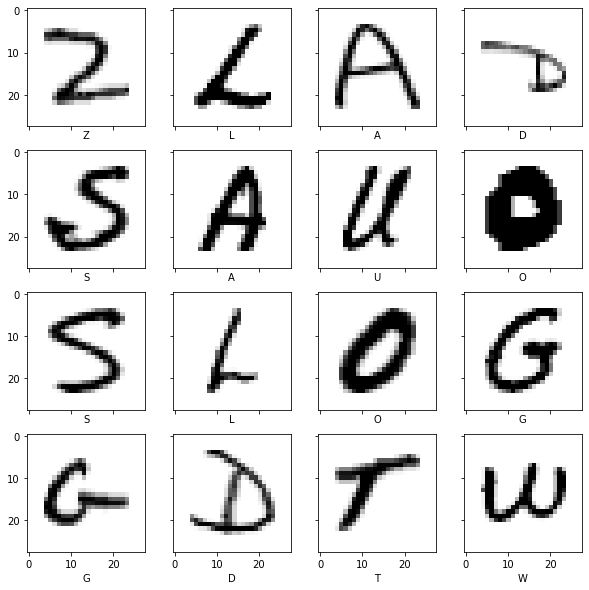

In [14]:
show_table(X,y,4)

## Building a CNN classification model (Sequential from keras)

In [43]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # for the one-hot-encoder

In [16]:
X.shape

(1000, 28, 28, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [24]:
y_trainOHE = to_categorical(y_train, num_classes = 26, dtype='int32')
y_testOHE = to_categorical(y_test, num_classes = 26, dtype='int32')

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64, activation ="relu"))
model.add(Dense(26, activation ="softmax"))

In [26]:
model.compile(optimizer = Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [28]:
history = model.fit(X_train, 
                    y_trainOHE, 
                    epochs=20, 
                    validation_data=(X_test, y_testOHE))

Epoch 1/20
29/29 [==============================] - 1s 40ms/step - loss: 2.8870 - accuracy: 0.2056 - val_loss: 2.6515 - val_accuracy: 0.3400
Epoch 2/20
29/29 [==============================] - 1s 30ms/step - loss: 2.0784 - accuracy: 0.4533 - val_loss: 1.8464 - val_accuracy: 0.4900
Epoch 3/20
29/29 [==============================] - 1s 29ms/step - loss: 1.2816 - accuracy: 0.6633 - val_loss: 1.3042 - val_accuracy: 0.6100
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9039 - accuracy: 0.7311 - val_loss: 1.1466 - val_accuracy: 0.6500
Epoch 5/20
29/29 [==============================] - 1s 27ms/step - loss: 0.6584 - accuracy: 0.8000 - val_loss: 0.7895 - val_accuracy: 0.7300
Epoch 6/20
29/29 [==============================] - 1s 27ms/step - loss: 0.3936 - accuracy: 0.8878 - val_loss: 0.7945 - val_accuracy: 0.7800
Epoch 7/20
29/29 [==============================] - 1s 30ms/step - loss: 0.3842 - accuracy: 0.8844 - val_loss: 0.7438 - val_accuracy: 0.7800
Epoch 8/20
29

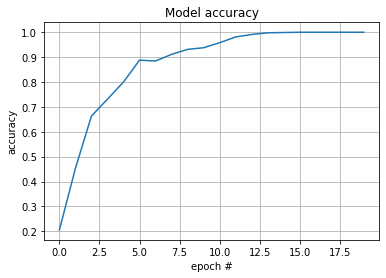

In [34]:
plt.plot(history.history['accuracy'])
plt.grid()
plt.title('Model accuracy');
plt.xlabel('epoch #');
plt.ylabel('accuracy');

In [143]:
# model.save(r'models/model_trained_on_1k_samples.h5')
# model_loaded = load_model('models/model_trained_on_100k_samples.h5')

## Predicting

In [49]:
import matplotlib.image as image
import os

In [55]:
def read_image(filename):
    return image.imread(f'tests/{filename}')[:,:,0].reshape((28,28,1))

In [56]:
def predict_drawn(image, model):
    prob = model.predict(np.array([image]))
    value = np.max(prob)
    prediction = np.argmax(prob)
    return letters_enumerated[prediction], value

In [141]:
def predict_drawn_all(model, save=False):
    files = os.listdir('tests')
    images = np.array([read_image(img) for img in files])
    probabilities = model.predict(images)
    predictions = np.argmax(probabilities, axis=1)
    confidence = np.around(np.max(probabilities, axis=1), 4)
    predictions_letters = list(map(lambda x: letters_enumerated[x], predictions))
    true_labels = list(map(lambda x: x[:x.find('.')], files))
    is_prediction_correct = [pred == true[0] for pred, true in zip(predictions_letters, true_labels)]
    res = list(zip(true_labels, predictions_letters, is_prediction_correct, confidence))
#     if save:
#         res_np = np.array(res)
#         np.savetxt('res.dat', res_np, delimiter='\t')
    return res

In [142]:
predict_drawn_all(model, 'res.dat')

[('A0', 'A', True, 0.9999),
 ('B0', 'O', False, 0.7977),
 ('C0', 'Q', False, 0.6879),
 ('C1', 'C', True, 0.9997),
 ('D0', 'D', True, 0.982),
 ('E0', 'E', True, 1.0),
 ('F0', 'P', False, 0.8127),
 ('F1', 'P', False, 0.9949),
 ('G0', 'Q', False, 0.9775),
 ('H0', 'H', True, 0.9999),
 ('I0', 'I', True, 0.9975),
 ('K0', 'K', True, 0.9985),
 ('L0', 'L', True, 0.9999),
 ('M0', 'A', False, 0.9993),
 ('M1', 'M', True, 0.5227),
 ('N0', 'N', True, 0.9949),
 ('O0', 'O', True, 1.0),
 ('P0', 'P', True, 1.0),
 ('R0', 'R', True, 0.9965),
 ('R1', 'R', True, 1.0),
 ('S0', 'S', True, 0.9997),
 ('S1', 'S', True, 1.0),
 ('T0', 'T', True, 1.0),
 ('Y0', 'Y', True, 0.9998)]